In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from tqdm import tqdm

In [12]:
df = pd.read_parquet("../data/time_slices.parquet")
X = df.drop(["winner", "season", "game"], axis=1)
y = df["winner"]

100%|██████████| 6/6 [03:56<00:00, 39.42s/it]


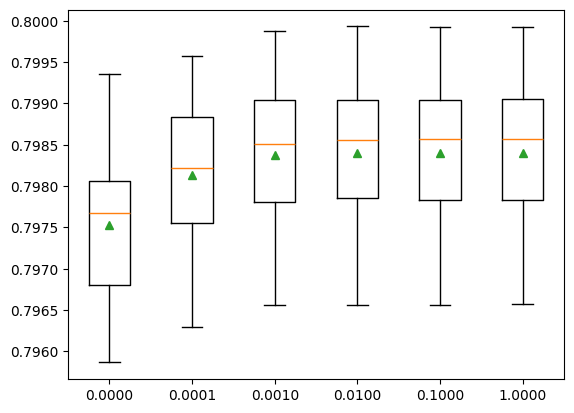

In [13]:
def get_models():
    models = {}
    for p in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]:
        key = "%.4f" % p
        models[key] = LogisticRegression(solver="liblinear", penalty="l2", C=p)
    return models

# evaluate using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)
    return scores

models: dict[float, LogisticRegression]
models = get_models()
results, names = [], []
for name, model in tqdm(models.items(), total=len(models)):
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)

# plot model performance
pyplot.boxplot(results, tick_labels=names, showmeans=True)
pyplot.show()

In [14]:
import pickle

target = models["1.0000"]  # pick model with best accuracy

fit = target.fit(X, y)

with open("meter.pkl", "wb") as f:
    pickle.dump(fit, f)